## Business Objective

Customer churn is a big problem for telecommunications companies. The goal of the project is to determine whether a customer 
will churn or not based on customer features. Below are customer features provided in the dataset 

●	state: Categorical, for the 51 states and the District of Columbia.

●	Area.code : Area Code

●	account.length: how long the account has been active.

●	voice.plan: yes or no, voicemail plan.

●	voice.messages: number of voicemail messages.

●	intl.plan: yes or no, international plan.

●	intl.mins: minutes customer used service to make international calls.

●	intl.calls: total number of international calls.

●	intl.charge: total international charge.

●	day.mins: minutes customer used service during the day.

●	day.calls: total number of calls during the day.

●	day.charge: total charge during the day.

●	eve.mins: minutes customer used service during the evening.

●	eve.calls: total number of calls during the evening.

●	eve.charge: total charge during the evening.

●	night.mins: minutes customer used service during the night.

●	night.calls: total number of calls during the night.

●	night.charge: total charge during the night.

●	customer.calls: number of calls to customer service.

●	churn: Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).


In [1]:
#Importing necessaary libraries for importing data, perform EDA and Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file
df = pd.read_csv("Churn.csv")
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [3]:
# removing rhe Unnamed column
df.drop(columns = "Unnamed: 0", inplace = True, axis = 'columns')

In [4]:
df.shape

(5000, 20)

In [5]:
#Renaming Column names as it can cause issue while working/addressing a specific column
#Replace '.' with '_'
df.rename(columns={'area.code': 'A_code','account.length': 'Actv_Days', 'voice.plan': 'V_plan',
                       'voice.messages':'V_msgs', 'intl.plan':'intl_plan',
                       'intl.mins':'intl_mins','intl.calls':'intl_calls',
                       'intl.charge':'intl_chrg','day.mins':'day_mins',
                       'day.calls':'day_calls','day.charge':'day_chrg','eve.mins':'eve_mins',
                       'eve.calls':'eve_calls','eve.charge':'eve_chrg','night.mins':'night_mins','night.calls':'night_calls',
                       'night.charge':'night_chrg','customer.calls':'cust_calls'},inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        5000 non-null   object 
 1   A_code       5000 non-null   object 
 2   Actv_Days    5000 non-null   int64  
 3   V_plan       5000 non-null   object 
 4   V_msgs       5000 non-null   int64  
 5   intl_plan    5000 non-null   object 
 6   intl_mins    5000 non-null   float64
 7   intl_calls   5000 non-null   int64  
 8   intl_chrg    5000 non-null   float64
 9   day_mins     5000 non-null   float64
 10  day_calls    5000 non-null   int64  
 11  day_chrg     5000 non-null   object 
 12  eve_mins     5000 non-null   object 
 13  eve_calls    5000 non-null   int64  
 14  eve_chrg     5000 non-null   float64
 15  night_mins   5000 non-null   float64
 16  night_calls  5000 non-null   int64  
 17  night_chrg   5000 non-null   float64
 18  cust_calls   5000 non-null   int64  
 19  churn 

There are 5 object variable, of which 

    -Three{voice.plan , intl.plan,churn} are binary(yes or no) entry feature and
    
    -Remaining two{day.charge,eve.mins} are float64 variable but are interpreted as object

So we apply data labelling and appropriate datatype conversion

In [7]:
df['V_plan'].replace(('yes', 'no'), (1, 0), inplace=True)
df['intl_plan'].replace(('yes', 'no'), (1, 0), inplace=True)
df['churn'].replace(('yes', 'no'), (1, 0), inplace=True)
for col in ['day_chrg', 'eve_mins']:
    df[col] = df[col].astype('float64')

In [8]:
#Checking for null values
df.isna().sum()

state           0
A_code          0
Actv_Days       0
V_plan          0
V_msgs          0
intl_plan       0
intl_mins       0
intl_calls      0
intl_chrg       0
day_mins        0
day_calls       0
day_chrg        7
eve_mins       24
eve_calls       0
eve_chrg        0
night_mins      0
night_calls     0
night_chrg      0
cust_calls      0
churn           0
dtype: int64

<AxesSubplot:xlabel='eve_mins', ylabel='Density'>

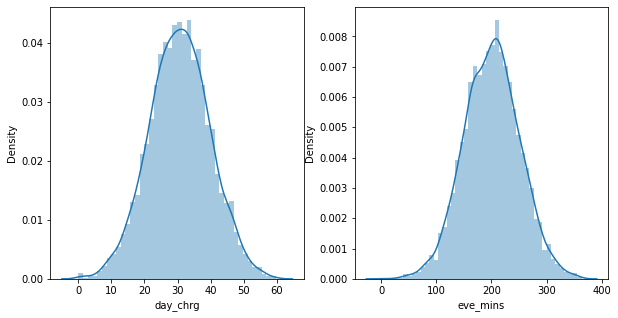

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['day_chrg'])
plt.subplot(1,2,2)
sns.distplot(df['eve_mins'])

We observe no skewness in data but lets check kurtosis value

If Kurtosis is normal we choose mean to impute missing values

Otherwise we check mode and then decide

In [10]:
print("Day charge Skewness:",df["day_chrg"].skew()," Kurtosis:",df["day_chrg"].kurtosis())
print("Evening minutes Skewness:",df["eve_mins"].skew()," Kurtosis:",df["eve_mins"].kurtosis())

Day charge Skewness: -0.01259526750615761  Kurtosis: -0.02288911356930967
Evening minutes Skewness: -0.01271267457881622  Kurtosis: 0.051728388241798484


In [11]:
df['day_chrg'] = df['day_chrg'].fillna(df['day_chrg'].mean())
df['eve_mins'] = df['eve_mins'].fillna(df['eve_mins'].mean())

In [12]:
df.isnull().sum()

state          0
A_code         0
Actv_Days      0
V_plan         0
V_msgs         0
intl_plan      0
intl_mins      0
intl_calls     0
intl_chrg      0
day_mins       0
day_calls      0
day_chrg       0
eve_mins       0
eve_calls      0
eve_chrg       0
night_mins     0
night_calls    0
night_chrg     0
cust_calls     0
churn          0
dtype: int64

In [13]:
#Checking for duplicates
df[df.duplicated()]

,state,A_code,Actv_Days,V_plan,V_msgs,intl_plan,intl_mins,intl_calls,intl_chrg,day_mins,day_calls,day_chrg,eve_mins,eve_calls,eve_chrg,night_mins,night_calls,night_chrg,cust_calls,churn


-There are no duplicate entries in the dataset

# Exploratory Data Analysis

<AxesSubplot:xlabel='A_code'>

<Figure size 1224x360 with 0 Axes>

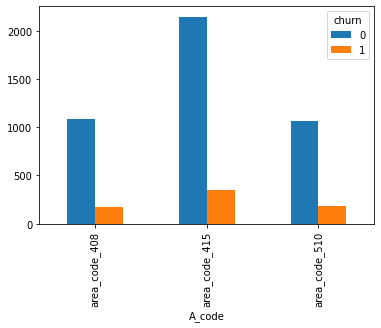

In [14]:
# Churn Value for each Area Code
plt.figure(figsize=(17,5),facecolor="yellow")
pd.crosstab(df["A_code"],df["churn"]).plot(kind="bar")

In [15]:
a = len(df[(df["V_plan"]==0)&(df["churn"]==1)& (df["intl_plan"]==0)])
b = len(df[(df["V_plan"]==0)&(df["churn"]==1)& (df["intl_plan"]==1)])
c = len(df[(df["intl_plan"]==0)&(df["churn"]==1)& (df["V_plan"]==1)])
d = len(df[(df["intl_plan"]==1)&(df["churn"]==1)& (df["V_plan"]==1)])
print(a,b,c,d)

452 153 56 46


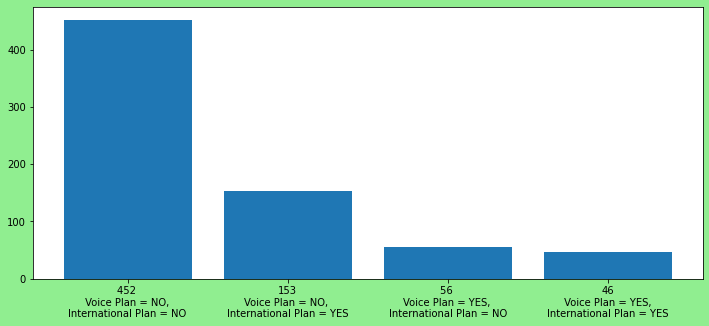

In [16]:
plt.figure(figsize=(12,5),facecolor="lightgreen")
x = np.array(["452 \n Voice Plan = NO, \nInternational Plan = NO", "153\nVoice Plan = NO, \nInternational Plan = YES", "56 \nVoice Plan = YES, \nInternational Plan = NO", "46\n Voice Plan = YES, \nInternational Plan = YES"])
y = np.array([a, b, c, d])
plt.bar(x,y)
plt.show()

<AxesSubplot:xlabel='intl_chrg', ylabel='Density'>

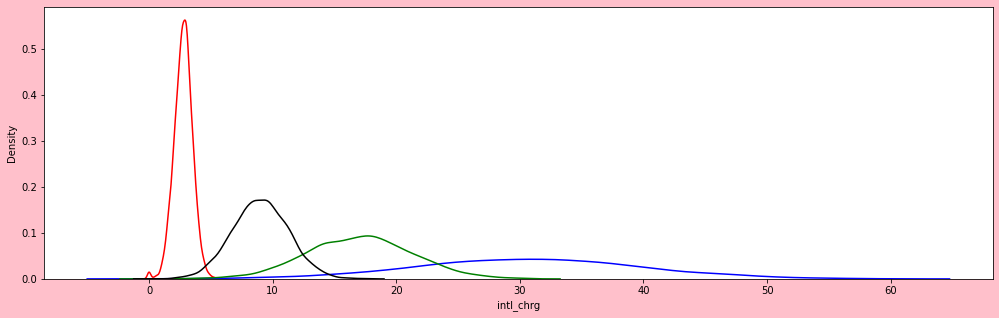

In [17]:
# density plot on all charges (International Charges, Day Charges, Evening Charges, Night Charges)
plt.figure(figsize=(17,5),facecolor="pink")
sns.kdeplot(df['intl_chrg'],color='red')
sns.kdeplot(df['day_chrg'],color='blue')
sns.kdeplot(df['eve_chrg'],color='green')
sns.kdeplot(df['night_chrg'],color='black')

In [18]:
# Calculating all the average value for different charges respective of their states
# this is done to find out the top and bottom states, and their churn performance 
avg_international_chrg = df.groupby(["state"])["intl_chrg"].mean()
sort_avg_international_chrg = avg_international_chrg.sort_values(ascending=True)
avg_day_chrg = df.groupby(["state"])["day_chrg"].mean()
sort_avg_day_chrg = avg_day_chrg.sort_values(ascending=True)
avg_eve_chrg = df.groupby(["state"])["eve_chrg"].mean()
sort_avg_eve_chrg = avg_eve_chrg.sort_values(ascending=True)
avg_night_chrg = df.groupby(["state"])["night_chrg"].mean()
sort_avg_night_chrg = avg_night_chrg.sort_values(ascending=True)

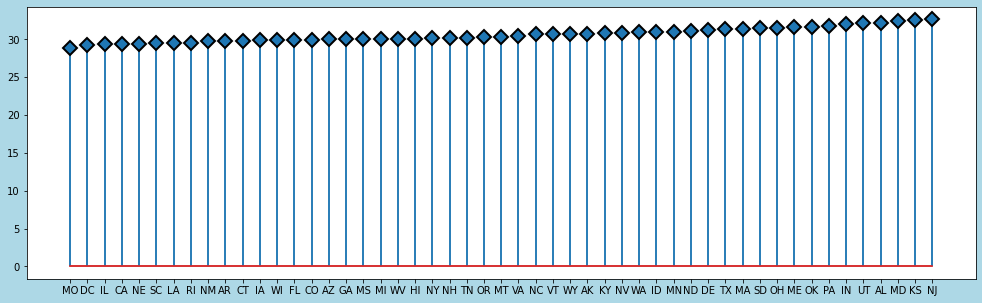

In [19]:
# Mean value of Day charges of their States
plt.figure(figsize=(17,5),facecolor="lightblue")
my_range=range(0,len(sort_avg_day_chrg.index))
plt.stem(sort_avg_day_chrg)
(markers, stemlines, baseline) = plt.stem(sort_avg_day_chrg)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="black", markeredgewidth=2,linewidth=0.5)
plt.xticks(my_range, sort_avg_day_chrg.index)
plt.show()

Text(0, 0.5, 'Last 3 States and their Churn Performance')

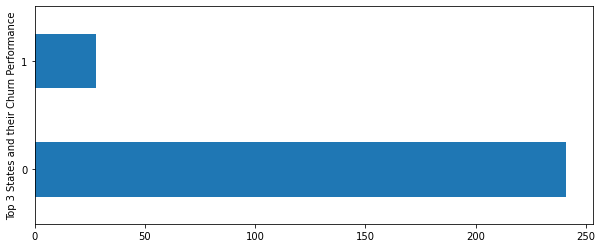

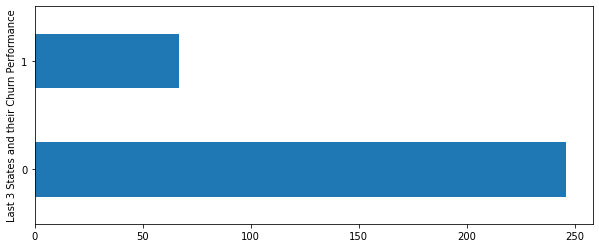

In [20]:
# Selecting the top 3 and the bottom 3 states and getting their Churn Performance for the Day Charges
plt.figure(figsize=(10,4))
df[(df["state"]=='MO')|(df["state"]=='DC')|(df["state"]=='IL')]['churn'] .value_counts().plot(kind="barh")
plt.ylabel("Top 3 States and their Churn Performance")

plt.figure(figsize=(10,4))
df[(df["state"]=='KS')|(df["state"]=='NJ')|(df["state"]=='MD')]['churn'] .value_counts().plot(kind="barh")
plt.ylabel("Last 3 States and their Churn Performance")

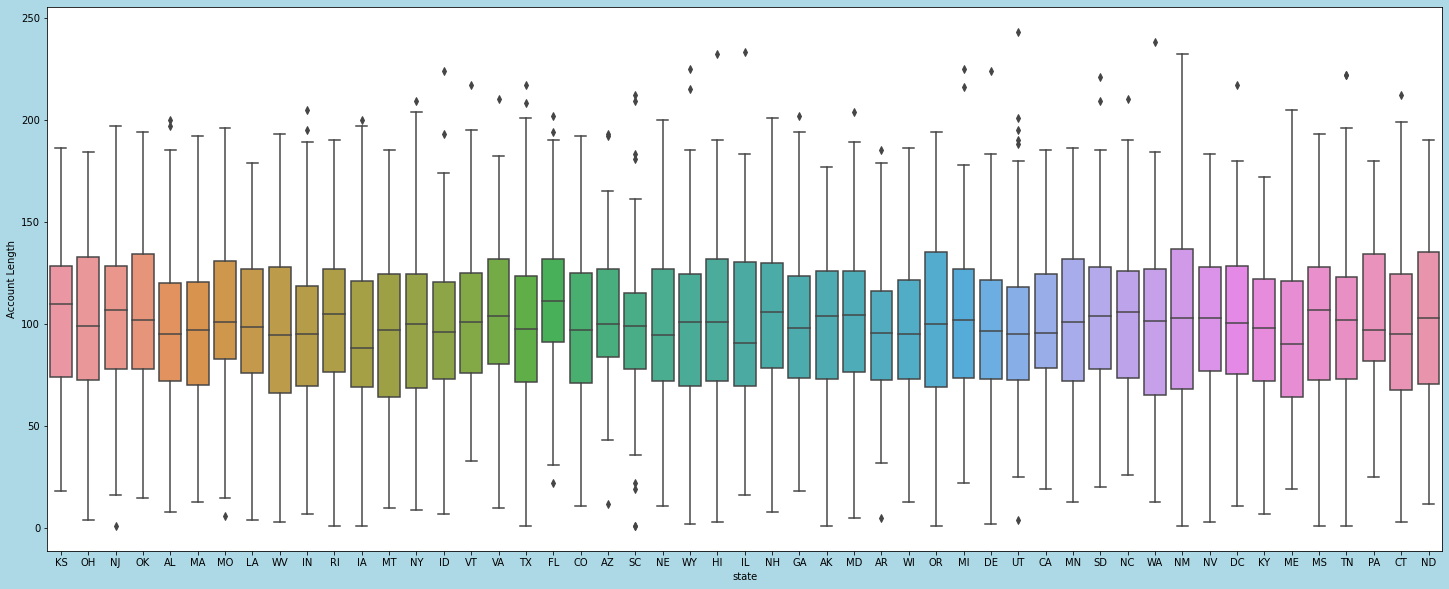

In [21]:
# Account Length and their BoxPlot
plt.figure(figsize=(25,10),facecolor="lightblue")
sns.boxplot(x='state', y='Actv_Days',data=df)
plt.ylabel('Account Length')
plt.show()

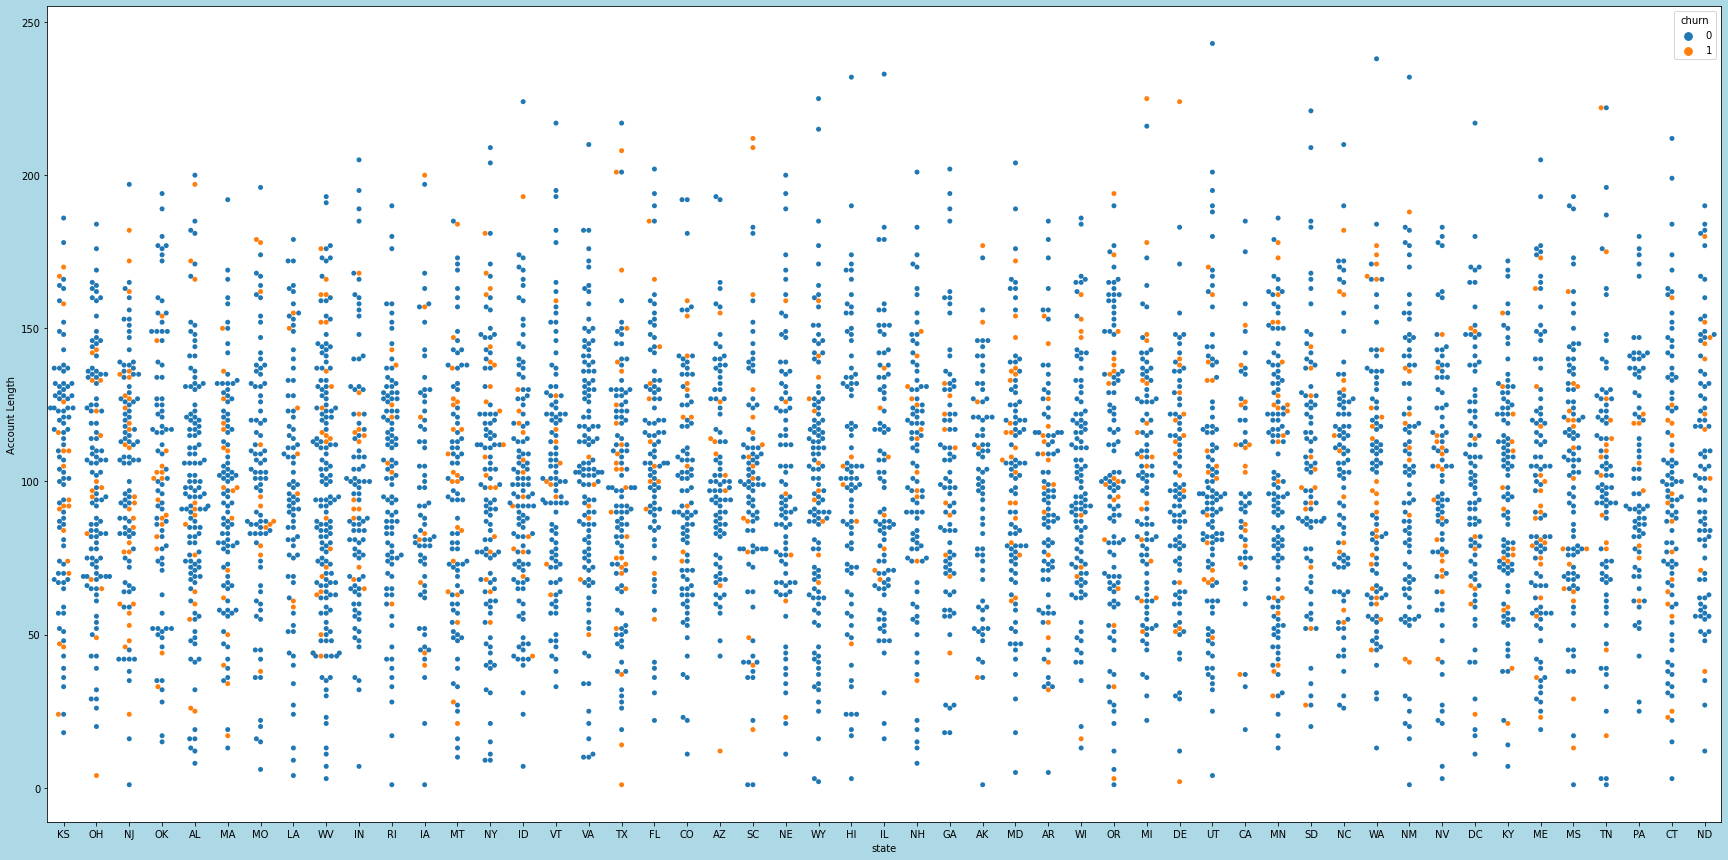

In [22]:
# Swarm Plot on Churn Performance and their states according to their Account Days
plt.figure(figsize=(30,15),facecolor="lightblue")
sns.swarmplot(x='state', y='Actv_Days', data=df, hue='churn')
plt.ylabel('Account Length')
plt.show()

## Checking for Data Imbalance

Text(0, 0.5, 'Frequency')

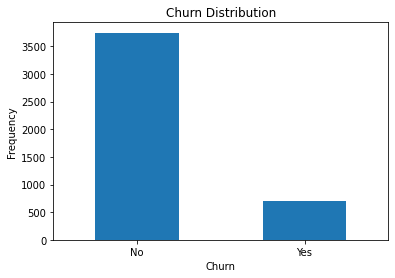

In [35]:
counts=df.churn.value_counts()
counts.plot(kind='bar', rot=0)
plt.title("Churn Distribution")
plt.xticks(range(2),['No','Yes'])
plt.xlabel("Churn")
plt.ylabel("Frequency")

This is an imbalance data, hence we apply data balancing technique on train dataset and build model

# Feature Engineering

In [23]:
l1 = df.columns

In [24]:
l1

Index(['state', 'A_code', 'Actv_Days', 'V_plan', 'V_msgs', 'intl_plan',
       'intl_mins', 'intl_calls', 'intl_chrg', 'day_mins', 'day_calls',
       'day_chrg', 'eve_mins', 'eve_calls', 'eve_chrg', 'night_mins',
       'night_calls', 'night_chrg', 'cust_calls', 'churn'],
      dtype='object')

In [25]:
#Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["state"]=LE.fit_transform(df[["state"]])
df["A_code"]=LE.fit_transform(df[["A_code"]])

## Checking for outliers

In [27]:
#We know that the given features shouldn't have negative value, so verifying the data
for i in l1:
    qmax = df[i].max()
    qmin = df[i].min()
    print(i)
    print("Upper Limit : ", qmax)
    print("Lower Limit : ", qmin)
    print("\n")

state
Upper Limit :  50
Lower Limit :  0


A_code
Upper Limit :  2
Lower Limit :  0


Actv_Days
Upper Limit :  243
Lower Limit :  1


V_plan
Upper Limit :  1
Lower Limit :  0


V_msgs
Upper Limit :  52
Lower Limit :  0


intl_plan
Upper Limit :  1
Lower Limit :  0


intl_mins
Upper Limit :  20.0
Lower Limit :  0.0


intl_calls
Upper Limit :  20
Lower Limit :  0


intl_chrg
Upper Limit :  5.4
Lower Limit :  0.0


day_mins
Upper Limit :  351.5
Lower Limit :  0.0


day_calls
Upper Limit :  165
Lower Limit :  0


day_chrg
Upper Limit :  59.76
Lower Limit :  0.0


eve_mins
Upper Limit :  363.7
Lower Limit :  0.0


eve_calls
Upper Limit :  170
Lower Limit :  0


eve_chrg
Upper Limit :  30.91
Lower Limit :  0.0


night_mins
Upper Limit :  395.0
Lower Limit :  0.0


night_calls
Upper Limit :  175
Lower Limit :  0


night_chrg
Upper Limit :  17.77
Lower Limit :  0.0


cust_calls
Upper Limit :  9
Lower Limit :  0


churn
Upper Limit :  1
Lower Limit :  0




<AxesSubplot:ylabel='day_chrg'>

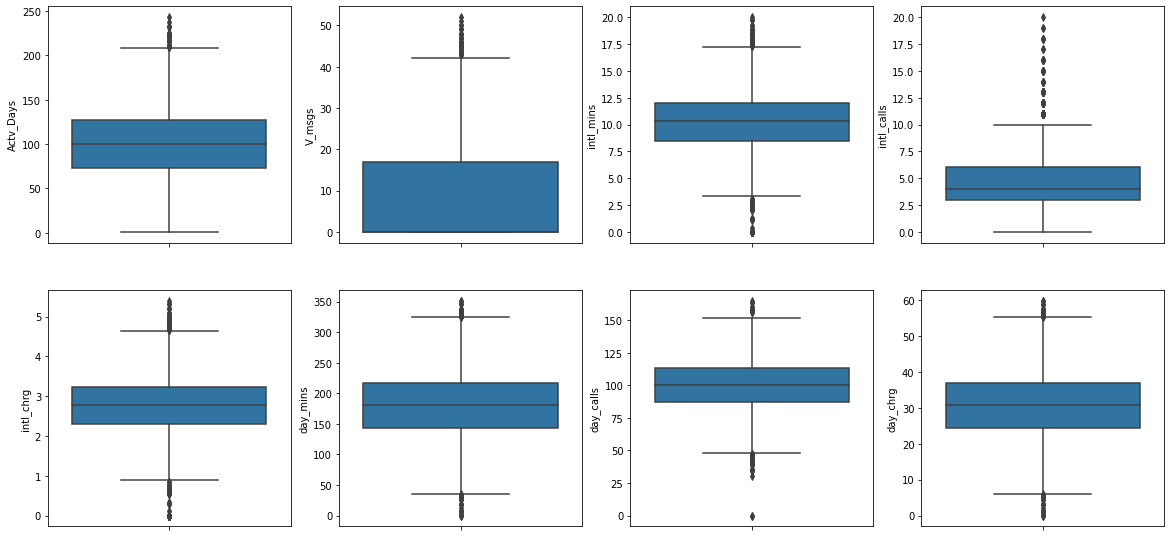

In [28]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.boxplot(y='Actv_Days',data=df)
plt.subplot(4,4,2)
sns.boxplot(y='V_msgs',data=df)
plt.subplot(4,4,3)
sns.boxplot(y='intl_mins',data=df)
plt.subplot(4,4,4)
sns.boxplot(y='intl_calls',data=df)
plt.subplot(4,4,5)
sns.boxplot(y='intl_chrg',data=df)
plt.subplot(4,4,6)
sns.boxplot(y='day_mins',data=df)
plt.subplot(4,4,7)
sns.boxplot(y='day_calls',data=df)
plt.subplot(4,4,8)
sns.boxplot(y='day_chrg',data=df)

<AxesSubplot:ylabel='cust_calls'>

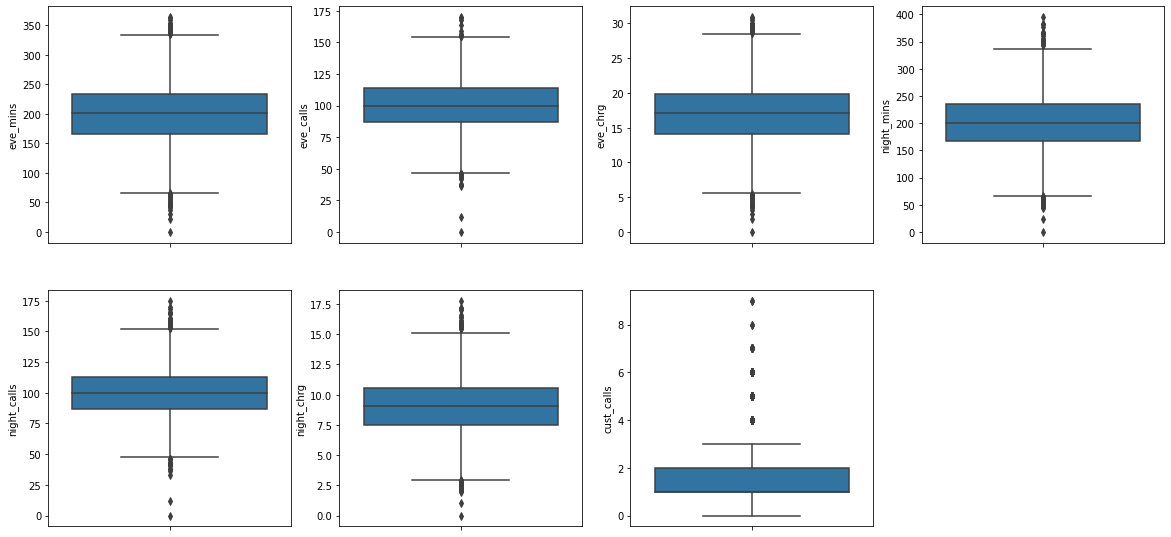

In [29]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.boxplot(y='eve_mins',data=df)
plt.subplot(4,4,2)
sns.boxplot(y='eve_calls',data=df)
plt.subplot(4,4,3)
sns.boxplot(y='eve_chrg',data=df)
plt.subplot(4,4,4)
sns.boxplot(y='night_mins',data=df)
plt.subplot(4,4,5)
sns.boxplot(y='night_calls',data=df)
plt.subplot(4,4,6)
sns.boxplot(y='night_chrg',data=df)
plt.subplot(4,4,7)
sns.boxplot(y='cust_calls',data=df)

In [30]:
l1 = ['Actv_Days', 'V_msgs','intl_mins','intl_calls','intl_chrg','day_mins','day_calls','day_chrg','eve_mins','eve_calls','eve_chrg','night_mins','night_calls','night_chrg','cust_calls']
# Removing the Outliers from the dataframe which have 'NO' Churn Value
for i in l1:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    for j in range(len(df)):
        if j not in df.index:
            continue
        if df['churn'][j] == 0:
            if (df[i][j] < (Q1 - (1.5*IQR))) or (df[i][j] > (Q3 + (1.5*IQR))):
                df=df.drop(j)

In [31]:
df.shape

(4453, 20)

In [32]:
#checking correlation
df.corr()

,state,A_code,Actv_Days,V_plan,V_msgs,intl_plan,intl_mins,intl_calls,intl_chrg,day_mins,day_calls,day_chrg,eve_mins,eve_calls,eve_chrg,night_mins,night_calls,night_chrg,cust_calls,churn
state,1.000000,0.009137,0.005606,-0.024102,-0.022528,-0.000542,-0.003185,0.005886,-0.003188,0.007117,-0.004355,0.007134,0.011472,-0.012966,0.011846,0.011677,-0.002585,0.011667,-0.006622,0.007515
A_code,0.009137,1.000000,-0.025948,-0.003326,-0.001548,0.028478,0.011195,-0.005209,0.011098,0.006877,-0.009200,0.006408,-0.003702,-0.006773,-0.004606,0.021115,0.014750,0.021112,0.018916,0.003040
Actv_Days,0.005606,-0.025948,1.000000,-0.003298,-0.014587,0.013971,0.011276,0.018864,0.011282,-0.001977,0.028510,-0.001723,-0.006648,0.018250,-0.007293,-0.005002,-0.000951,-0.005018,-0.003050,0.028627
V_plan,-0.024102,-0.003326,-0.003298,1.000000,0.959576,0.015133,0.007177,-0.020361,0.007214,-0.002839,-0.002830,-0.003117,0.015865,-0.011269,0.016133,-0.002755,0.006074,-0.002756,-0.031879,-0.108537
V_msgs,-0.022528,-0.001548,-0.014587,0.959576,1.000000,0.017777,0.009315,-0.010963,0.009347,0.003081,-0.000643,0.002814,0.013948,-0.010980,0.014580,-0.002985,-0.002352,-0.002990,-0.021101,-0.092075
intl_plan,-0.000542,0.028478,0.013971,0.015133,0.017777,1.000000,0.039892,0.006510,0.039851,0.030095,0.012514,0.029950,0.021861,0.000089,0.023181,-0.029201,0.001144,-0.029198,-0.003076,0.265928
intl_mins,-0.003185,0.011195,0.011276,0.007177,0.009315,0.039892,1.000000,0.007242,0.999992,-0.015194,0.010008,-0.014957,-0.001038,-0.013360,-0.001106,-0.008227,0.009585,-0.008226,-0.018143,0.062765
intl_calls,0.005886,-0.005209,0.018864,-0.020361,-0.010963,0.006510,0.007242,1.000000,0.007343,0.009064,0.014289,0.008724,0.011030,-0.001568,0.011513,-0.008003,0.000474,-0.007983,-0.009491,-0.028727
intl_chrg,-0.003188,0.011098,0.011282,0.007214,0.009347,0.039851,0.999992,0.007343,1.000000,-0.015126,0.010065,-0.014891,-0.001035,-0.013391,-0.001104,-0.008146,0.009563,-0.008145,-0.018209,0.062757
day_mins,0.007117,0.006877,-0.001977,-0.002839,0.003081,0.030095,-0.015194,0.009064,-0.015126,1.000000,0.014252,0.999737,0.007203,0.006930,0.007749,0.020916,0.002970,0.020902,-0.046820,0.223851


-state and Area code have less correlation with target variable 

Below independent variables are high correlated to each other (Can drop one feature)
    
    -intl min and intl charge
    
    -day min and day charge 
    
    -eve min and eve charge 
    
    -night min and night charge


Hence we drop these features Dataset

In [33]:
#droping the columns which have high correlated features
df=df.drop(['state','A_code',"intl_mins","day_mins","eve_mins","night_mins"],axis=1)
df.columns

Index(['Actv_Days', 'V_plan', 'V_msgs', 'intl_plan', 'intl_calls', 'intl_chrg',
       'day_calls', 'day_chrg', 'eve_calls', 'eve_chrg', 'night_calls',
       'night_chrg', 'cust_calls', 'churn'],
      dtype='object')

# Data Scaling 

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[['V_msgs','intl_calls', 'intl_chrg',  'day_calls', 
    'day_chrg', 'eve_calls', 'eve_chrg',  'night_calls',
    'night_chrg', 'cust_calls']] = mms.fit_transform(df[['V_msgs','intl_calls', 'intl_chrg',  'day_calls',
                                                         'day_chrg', 'eve_calls', 'eve_chrg',  'night_calls',
                                                         'night_chrg', 'cust_calls']])
df.head()

,Actv_Days,V_plan,V_msgs,intl_plan,intl_calls,intl_chrg,day_calls,day_chrg,eve_calls,eve_chrg,night_calls,night_chrg,cust_calls,churn
0,128,1,0.520833,0,0.15,0.500000,0.666667,0.754183,0.469231,0.474526,0.575949,0.641235,0.111111,0
1,107,1,0.541667,0,0.15,0.685185,0.745455,0.459672,0.500000,0.468576,0.651899,0.666861,0.111111,0
2,137,0,0.000000,0,0.25,0.609259,0.690909,0.692436,0.553846,0.233544,0.658228,0.426325,0.000000,0
4,75,0,0.000000,1,0.15,0.505556,0.684848,0.474230,0.646154,0.319450,0.765823,0.489808,0.333333,0
5,118,0,0.000000,1,0.30,0.314815,0.593939,0.635542,0.484615,0.547787,0.746835,0.534653,0.000000,0


## Data Split

In [36]:
X = df.drop(columns=['churn'])
Y = df['churn']

In [37]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=21)

# Data Balancing

In [38]:
from imblearn.over_sampling import RandomOverSampler #OverSampling using RandomOverSampling
from imblearn.combine import SMOTETomek #used for oversampling
from imblearn.under_sampling import NearMiss  #used for undersampling

## Under Sampling

In [39]:
us =NearMiss()
X_US,Y_US=us.fit_resample(X_train,y_train)

Text(0, 0.5, 'Frequency')

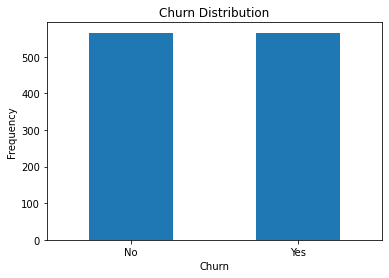

In [40]:
df_temp=X_US.join(Y_US)
counts=df_temp.churn.value_counts()
counts.plot(kind='bar', rot=0)
plt.title("Churn Distribution")
plt.xticks(range(2),['No','Yes'])
plt.xlabel("Churn")
plt.ylabel("Frequency")

## Random Over Sampling

In [41]:
OSam =RandomOverSampler(random_state=42)
X_OS,Y_OS=OSam.fit_resample(X_train,y_train)

Text(0, 0.5, 'Frequency')

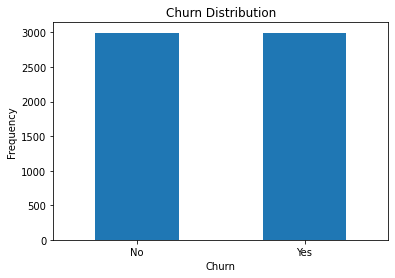

In [42]:
df_temp=X_OS.join(Y_OS)
counts=df_temp.churn.value_counts()
counts.plot(kind='bar', rot=0)
plt.title("Churn Distribution")
plt.xticks(range(2),['No','Yes'])
plt.xlabel("Churn")
plt.ylabel("Frequency")

## SMOTE (Synthetic Minority Over Sampling Technique)

In [43]:
smk =SMOTETomek(random_state=42)
X_SM,Y_SM=smk.fit_resample(X_train,y_train)

Text(0, 0.5, 'Frequency')

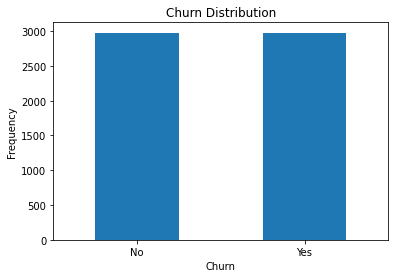

In [44]:
df_temp=X_SM.join(Y_SM)
counts=df_temp.churn.value_counts()
counts.plot(kind='bar', rot=0)
plt.title("Churn Distribution")
plt.xticks(range(2),['No','Yes'])
plt.xlabel("Churn")
plt.ylabel("Frequency")

<AxesSubplot:title={'center':'SMOTE'}, xlabel='Actv_Days', ylabel='intl_chrg'>

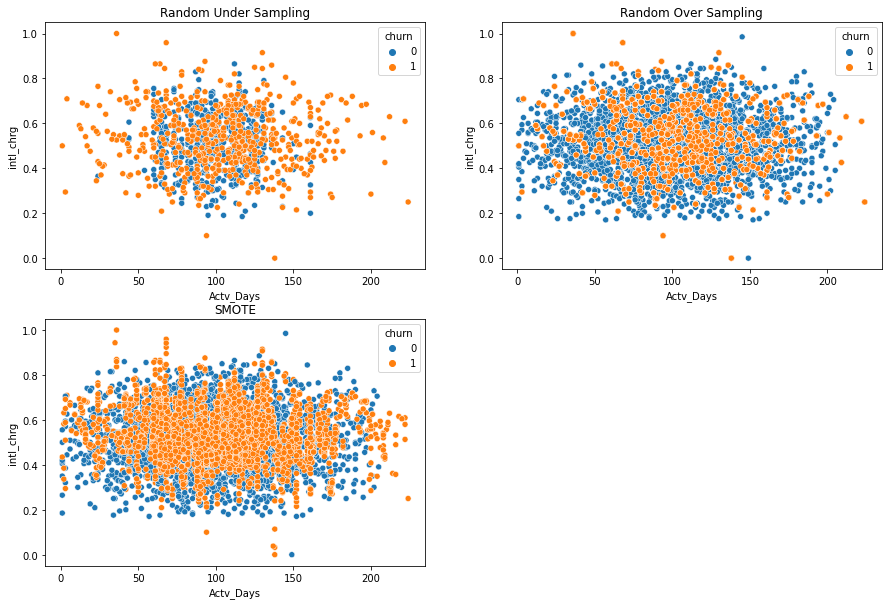

In [45]:
#Ploting the distribution of data points generated for each sampling techniques
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.title("Random Under Sampling")
df_temp1=X_US.join(Y_US)
sns.scatterplot(x = X_US['Actv_Days'], y = X_US['intl_chrg'], hue = Y_US, data = df_temp1)
plt.subplot(2,2,2)
plt.title("Random Over Sampling")
df_temp2=X_OS.join(Y_OS)
sns.scatterplot(x = X_OS['Actv_Days'], y = X_OS['intl_chrg'], hue = Y_OS, data = df_temp2)
plt.subplot(2,2,3)
plt.title("SMOTE")
df_temp3=X_SM.join(Y_SM)
sns.scatterplot(x = X_SM['Actv_Days'], y = X_SM['intl_chrg'], hue = Y_SM, data = df_temp3)

# Model Building

In [46]:
# Libraries necessary to get evaluation metrics and generate report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 1.Logistic Regression

### Without Data Balancing 

In [47]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
Y_predtrain1=LR.predict(X_train)
Y_predtest1=LR.predict(X_test)

CM1=confusion_matrix(y_train,Y_predtrain1)
print("confusion_matrix:\n", CM1)

AC_train1=accuracy_score(y_train,Y_predtrain1)
print("accuracy of train data:\n",round(AC_train1*100,2))

AC_test1=accuracy_score(y_test,Y_predtest1)
print("accuracy of test data:\n",round(AC_test1*100,2))


CR1=classification_report(y_train,Y_predtrain1)
print("Report of train: \n",CR1)

CR_test1=classification_report(y_test,Y_predtest1)
print("Report of test: \n",CR_test1)

confusion_matrix:
 [[2930   66]
 [ 412  154]]
accuracy of train data:
 86.58
accuracy of test data:
 86.08
Report of train: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92      2996
           1       0.70      0.27      0.39       566

    accuracy                           0.87      3562
   macro avg       0.79      0.63      0.66      3562
weighted avg       0.85      0.87      0.84      3562

Report of test: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       750
           1       0.65      0.26      0.37       141

    accuracy                           0.86       891
   macro avg       0.76      0.61      0.64       891
weighted avg       0.84      0.86      0.83       891



### With Balancing 

In [48]:
LR.fit(X_SM,Y_SM)
Y_predtrain2=LR.predict(X_SM)
Y_predtest2=LR.predict(X_test)

CM2=confusion_matrix(Y_SM,Y_predtrain2)
print("confusion_matrix:\n", CM2)

AC_train2=accuracy_score(Y_SM,Y_predtrain2)
print("accuracy of train data:\n",round(AC_train2*100,2))

AC_test2=accuracy_score(y_test,Y_predtest2)
print("accuracy of test data:\n",round(AC_test2*100,2))


CR2=classification_report(Y_SM,Y_predtrain2)
print("Report of train: \n",CR2)

CR_test2=classification_report(y_test,Y_predtest2)
print("Report of test: \n",CR_test2)

confusion_matrix:
 [[2299  678]
 [ 565 2412]]
accuracy of train data:
 79.12
accuracy of test data:
 78.68
Report of train: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      2977
           1       0.78      0.81      0.80      2977

    accuracy                           0.79      5954
   macro avg       0.79      0.79      0.79      5954
weighted avg       0.79      0.79      0.79      5954

Report of test: 
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       750
           1       0.40      0.72      0.52       141

    accuracy                           0.79       891
   macro avg       0.67      0.76      0.69       891
weighted avg       0.85      0.79      0.81       891



# 2. Naive Bayes model

### Without Data Balancing 

In [49]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(X_train,y_train)
Y_predtrain3=NB.predict(X_train)
Y_predtest3=NB.predict(X_test)

CM3=confusion_matrix(y_train,Y_predtrain3)
print("confusion_matrix:\n", CM3)

AC_train3=accuracy_score(y_train,Y_predtrain3)
print("accuracy of train data:\n",round(AC_train3*100,2))

AC_test3=accuracy_score(y_test,Y_predtest3)
print("accuracy of test data:\n",round(AC_test3*100,2))


CR3=classification_report(y_train,Y_predtrain3)
print("Report of train: \n",CR3)

CR_test3=classification_report(y_test,Y_predtest3)
print("Report of test: \n",CR_test3)

confusion_matrix:
 [[2996    0]
 [ 561    5]]
accuracy of train data:
 84.25
accuracy of test data:
 84.29
Report of train: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2996
           1       1.00      0.01      0.02       566

    accuracy                           0.84      3562
   macro avg       0.92      0.50      0.47      3562
weighted avg       0.87      0.84      0.77      3562

Report of test: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       750
           1       1.00      0.01      0.01       141

    accuracy                           0.84       891
   macro avg       0.92      0.50      0.46       891
weighted avg       0.87      0.84      0.77       891



### With Balancing 

In [50]:
NB.fit(X_SM,Y_SM)
Y_predtrain4=NB.predict(X_SM)
Y_predtest4=NB.predict(X_test)

CM4=confusion_matrix(Y_SM,Y_predtrain4)
print("confusion_matrix:\n", CM4)

AC_train4=accuracy_score(Y_SM,Y_predtrain4)
print("accuracy of train data:\n",round(AC_train4*100,2))

AC_test4=accuracy_score(y_test,Y_predtest4)
print("accuracy of test data:\n",round(AC_test4*100,2))


CR4=classification_report(Y_SM,Y_predtrain4)
print("Report of train: \n",CR4)

CR_test4=classification_report(y_test,Y_predtest4)
print("Report of test: \n",CR_test4)

confusion_matrix:
 [[ 827 2150]
 [ 299 2678]]
accuracy of train data:
 58.87
accuracy of test data:
 35.02
Report of train: 
               precision    recall  f1-score   support

           0       0.73      0.28      0.40      2977
           1       0.55      0.90      0.69      2977

    accuracy                           0.59      5954
   macro avg       0.64      0.59      0.54      5954
weighted avg       0.64      0.59      0.54      5954

Report of test: 
               precision    recall  f1-score   support

           0       0.89      0.26      0.40       750
           1       0.17      0.83      0.29       141

    accuracy                           0.35       891
   macro avg       0.53      0.54      0.35       891
weighted avg       0.78      0.35      0.38       891



# 3. Decision Tree

### Without Data Balancing 

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT =  DecisionTreeClassifier()        
DT.fit(X_train, y_train)
Y_predtrain5=DT.predict(X_train)
Y_predtest5=DT.predict(X_test)

CM5=confusion_matrix(y_train,Y_predtrain5)
print("confusion_matrix:\n", CM5)

AC_train5=accuracy_score(y_train,Y_predtrain5)
print("accuracy of train data:\n",round(AC_train5*100,2))

AC_test5=accuracy_score(y_test,Y_predtest5)
print("accuracy of test data:\n",round(AC_test5*100,2))


CR5=classification_report(y_train,Y_predtrain5)
print("Report of train: \n",CR5)

CR_test5=classification_report(y_test,Y_predtest5)
print("Report of test: \n",CR_test5)

confusion_matrix:
 [[2996    0]
 [   0  566]]
accuracy of train data:
 100.0
accuracy of test data:
 93.15
Report of train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2996
           1       1.00      1.00      1.00       566

    accuracy                           1.00      3562
   macro avg       1.00      1.00      1.00      3562
weighted avg       1.00      1.00      1.00      3562

Report of test: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       750
           1       0.77      0.80      0.79       141

    accuracy                           0.93       891
   macro avg       0.87      0.88      0.87       891
weighted avg       0.93      0.93      0.93       891



### With Balancing 

In [52]:
DT.fit(X_SM,Y_SM)
Y_predtrain6=DT.predict(X_SM)
Y_predtest6=DT.predict(X_test)

CM6=confusion_matrix(Y_SM,Y_predtrain6)
print("confusion_matrix:\n", CM6)

AC_train6=accuracy_score(Y_SM,Y_predtrain6)
print("accuracy of train data:\n",round(AC_train6*100,2))

AC_test6=accuracy_score(y_test,Y_predtest6)
print("accuracy of test data:\n",round(AC_test6*100,2))


CR6=classification_report(Y_SM,Y_predtrain6)
print("Report of train: \n",CR6)

CR_test6=classification_report(y_test,Y_predtest6)
print("Report of test: \n",CR_test6)

confusion_matrix:
 [[2977    0]
 [   0 2977]]
accuracy of train data:
 100.0
accuracy of test data:
 87.65
Report of train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2977
           1       1.00      1.00      1.00      2977

    accuracy                           1.00      5954
   macro avg       1.00      1.00      1.00      5954
weighted avg       1.00      1.00      1.00      5954

Report of test: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       750
           1       0.58      0.79      0.67       141

    accuracy                           0.88       891
   macro avg       0.77      0.84      0.80       891
weighted avg       0.90      0.88      0.88       891



# 4.Gradient Boosting

### Without Data Balancing 

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
GBR=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)

GBR.fit(X_train,y_train)
Y_predtrain7=GBR.predict(X_train)
Y_predtest7=GBR.predict(X_test)

CM7=confusion_matrix(y_train,Y_predtrain7)
print("confusion_matrix:\n", CM7)

AC_train7=accuracy_score(y_train,Y_predtrain7)
print("accuracy of train data:\n",round(AC_train7*100,2))

AC_test7=accuracy_score(y_test,Y_predtest7)
print("accuracy of test data:\n",round(AC_test7*100,2))


CR7=classification_report(y_train,Y_predtrain7)
print("Report of train: \n",CR7)

CR_test7=classification_report(y_test,Y_predtest7)
print("Report of test: \n",CR_test7)

confusion_matrix:
 [[2990    6]
 [  86  480]]
accuracy of train data:
 97.42
accuracy of test data:
 96.3
Report of train: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2996
           1       0.99      0.85      0.91       566

    accuracy                           0.97      3562
   macro avg       0.98      0.92      0.95      3562
weighted avg       0.97      0.97      0.97      3562

Report of test: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       750
           1       0.95      0.81      0.87       141

    accuracy                           0.96       891
   macro avg       0.96      0.90      0.93       891
weighted avg       0.96      0.96      0.96       891



### With Balancing 

In [54]:
GBR.fit(X_SM,Y_SM)
Y_predtrain8=GBR.predict(X_SM)
Y_predtest8=GBR.predict(X_test)

CM8=confusion_matrix(Y_SM,Y_predtrain8)
print("confusion_matrix:\n", CM8)

AC_train8=accuracy_score(Y_SM,Y_predtrain8)
print("accuracy of train data:\n",round(AC_train8*100,2))

AC_test8=accuracy_score(y_test,Y_predtest8)
print("accuracy of test data:\n",round(AC_test8*100,2))


CR8=classification_report(Y_SM,Y_predtrain8)
print("Report of train: \n",CR8)

CR_test8=classification_report(y_test,Y_predtest8)
print("Report of test: \n",CR_test8)

confusion_matrix:
 [[2933   44]
 [ 185 2792]]
accuracy of train data:
 96.15
accuracy of test data:
 95.06
Report of train: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      2977
           1       0.98      0.94      0.96      2977

    accuracy                           0.96      5954
   macro avg       0.96      0.96      0.96      5954
weighted avg       0.96      0.96      0.96      5954

Report of test: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       750
           1       0.85      0.83      0.84       141

    accuracy                           0.95       891
   macro avg       0.91      0.90      0.91       891
weighted avg       0.95      0.95      0.95       891



# 5.Random Forest

### Without Data Balancing 

In [55]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=6,n_estimators=400,max_features=10)
RF.fit(X_train,y_train)
Y_predtrain9=RF.predict(X_train)
Y_predtest9=RF.predict(X_test)

CM9=confusion_matrix(y_train,Y_predtrain9)
print("confusion_matrix:\n", CM9)

AC_train9=accuracy_score(y_train,Y_predtrain9)
print("accuracy of train data:\n",round(AC_train9*100,2))

AC_test9=accuracy_score(y_test,Y_predtest9)
print("accuracy of test data:\n",round(AC_test9*100,2))


CR9=classification_report(y_train,Y_predtrain9)
print("Report of train: \n",CR9)

CR_test9=classification_report(y_test,Y_predtest9)
print("Report of test: \n",CR_test9)

confusion_matrix:
 [[2991    5]
 [  95  471]]
accuracy of train data:
 97.19
accuracy of test data:
 95.96
Report of train: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2996
           1       0.99      0.83      0.90       566

    accuracy                           0.97      3562
   macro avg       0.98      0.92      0.94      3562
weighted avg       0.97      0.97      0.97      3562

Report of test: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       750
           1       0.95      0.79      0.86       141

    accuracy                           0.96       891
   macro avg       0.95      0.89      0.92       891
weighted avg       0.96      0.96      0.96       891



### With Balancing 

In [56]:
RF.fit(X_SM,Y_SM)
Y_predtrain10=RF.predict(X_SM)
Y_predtest10=RF.predict(X_test)

CM10=confusion_matrix(Y_SM,Y_predtrain10)
print("confusion_matrix:\n", CM10)

AC_train10=accuracy_score(Y_SM,Y_predtrain10)
print("accuracy of train data:\n",round(AC_train10*100,2))

AC_test10=accuracy_score(y_test,Y_predtest10)
print("accuracy of test data:\n",round(AC_test10*100,2))


CR10=classification_report(Y_SM,Y_predtrain10)
print("Report of train: \n",CR10)

CR_test10=classification_report(y_test,Y_predtest10)
print("Report of test: \n",CR_test10)

confusion_matrix:
 [[2848  129]
 [ 625 2352]]
accuracy of train data:
 87.34
accuracy of test data:
 92.59
Report of train: 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      2977
           1       0.95      0.79      0.86      2977

    accuracy                           0.87      5954
   macro avg       0.88      0.87      0.87      5954
weighted avg       0.88      0.87      0.87      5954

Report of test: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       750
           1       0.73      0.85      0.78       141

    accuracy                           0.93       891
   macro avg       0.85      0.90      0.87       891
weighted avg       0.93      0.93      0.93       891



# 6.SVM

In [57]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [58]:
clf1= SVC(kernel='linear',gamma = 0.001)
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100

print("Accuracy with linear kernel :",round(acc,2))

Accuracy with linear kernel : 85.19


### Performing Grid Search CV

In [59]:
#clf_m = SVC()
#param_grid = [{'kernel':['linear'],'gamma':[50,5,10,0.5,0.01,0.001],'C':[15,12,10,0.1,0.001] }]
#gsv = GridSearchCV(clf_m,param_grid,cv=10)
#gsv_result=gsv.fit(X_train,y_train)

In [60]:
#gsv.best_params_ , gsv.best_score_

### Without Data Balancing 

In [61]:
#Final Model
clf_final= SVC(kernel='linear',gamma = 50,C=10)
clf_final.fit(X_train,y_train)
Y_predtrain11=clf_final.predict(X_train)
Y_predtest11=clf_final.predict(X_test)

CM11=confusion_matrix(y_train,Y_predtrain11)
print("confusion_matrix:\n", CM11)

AC_train11=accuracy_score(y_train,Y_predtrain11)
print("accuracy of train data:\n",round(AC_train11*100,2))

AC_test11=accuracy_score(y_test,Y_predtest11)
print("accuracy of test data:\n",round(AC_test11*100,2))


CR11=classification_report(y_train,Y_predtrain11)
print("Report of train: \n",CR11)

CR_test11=classification_report(y_test,Y_predtest11)
print("Report of test: \n",CR_test11)

confusion_matrix:
 [[2967   29]
 [ 474   92]]
accuracy of train data:
 85.88
accuracy of test data:
 85.63
Report of train: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2996
           1       0.76      0.16      0.27       566

    accuracy                           0.86      3562
   macro avg       0.81      0.58      0.59      3562
weighted avg       0.85      0.86      0.82      3562

Report of test: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       750
           1       0.76      0.13      0.23       141

    accuracy                           0.86       891
   macro avg       0.81      0.56      0.57       891
weighted avg       0.84      0.86      0.81       891



### With Balancing 

In [62]:
clf_final.fit(X_SM,Y_SM)
Y_predtrain12=clf_final.predict(X_SM)
Y_predtest12=clf_final.predict(X_test)

CM12=confusion_matrix(Y_SM,Y_predtrain12)
print("confusion_matrix:\n", CM12)

AC_train12=accuracy_score(Y_SM,Y_predtrain12)
print("accuracy of train data:\n",round(AC_train12*120,2))

AC_test12=accuracy_score(y_test,Y_predtest12)
print("accuracy of test data:\n",round(AC_test12*120,2))


CR12=classification_report(Y_SM,Y_predtrain12)
print("Report of train: \n",CR12)

CR_test12=classification_report(y_test,Y_predtest12)
print("Report of test: \n",CR_test12)

confusion_matrix:
 [[2294  683]
 [ 525 2452]]
accuracy of train data:
 95.65
accuracy of test data:
 94.01
Report of train: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2977
           1       0.78      0.82      0.80      2977

    accuracy                           0.80      5954
   macro avg       0.80      0.80      0.80      5954
weighted avg       0.80      0.80      0.80      5954

Report of test: 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       750
           1       0.40      0.73      0.52       141

    accuracy                           0.78       891
   macro avg       0.67      0.76      0.69       891
weighted avg       0.85      0.78      0.81       891



# 7.K- Nearest Neighbours

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

### Hyperparameter tuning 

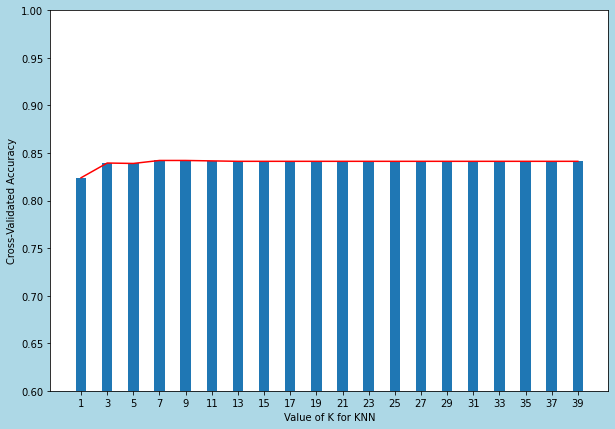

In [64]:
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize = (10,7), facecolor = 'lightblue')
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [65]:
#Using Elbow plot we determined optimal value for k=7

### Without Data Balancing 

In [66]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
Y_predtrain13=model.predict(X_train)
Y_predtest13=model.predict(X_test)

CM13=confusion_matrix(y_train,Y_predtrain13)
print("confusion_matrix:\n", CM13)

AC_train13=accuracy_score(y_train,Y_predtrain13)
print("accuracy of train data:\n",round(AC_train13*100,2))

AC_test13=accuracy_score(y_test,Y_predtest13)
print("accuracy of test data:\n",round(AC_test13*100,2))


CR13=classification_report(y_train,Y_predtrain13)
print("Report of train: \n",CR13)

CR_test13=classification_report(y_test,Y_predtest13)
print("Report of test: \n",CR_test13)

confusion_matrix:
 [[2983   13]
 [ 507   59]]
accuracy of train data:
 85.4
accuracy of test data:
 83.95
Report of train: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2996
           1       0.82      0.10      0.18       566

    accuracy                           0.85      3562
   macro avg       0.84      0.55      0.55      3562
weighted avg       0.85      0.85      0.80      3562

Report of test: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       750
           1       0.40      0.03      0.05       141

    accuracy                           0.84       891
   macro avg       0.62      0.51      0.48       891
weighted avg       0.77      0.84      0.78       891



### With Balancing 

In [67]:
model.fit(X_SM,Y_SM)
Y_predtrain14=model.predict(X_SM)
Y_predtest14=model.predict(X_test)

CM14=confusion_matrix(Y_SM,Y_predtrain14)
print("confusion_matrix:\n", CM14)

AC_train14=accuracy_score(Y_SM,Y_predtrain14)
print("accuracy of train data:\n",round(AC_train14*140,2))

AC_test14=accuracy_score(y_test,Y_predtest14)
print("accuracy of test data:\n",round(AC_test14*140,2))


CR14=classification_report(Y_SM,Y_predtrain14)
print("Report of train: \n",CR14)

CR_test14=classification_report(y_test,Y_predtest14)
print("Report of test: \n",CR_test14)

confusion_matrix:
 [[2363  614]
 [ 197 2780]]
accuracy of train data:
 120.93
accuracy of test data:
 92.39
Report of train: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      2977
           1       0.82      0.93      0.87      2977

    accuracy                           0.86      5954
   macro avg       0.87      0.86      0.86      5954
weighted avg       0.87      0.86      0.86      5954

Report of test: 
               precision    recall  f1-score   support

           0       0.88      0.69      0.77       750
           1       0.23      0.49      0.31       141

    accuracy                           0.66       891
   macro avg       0.55      0.59      0.54       891
weighted avg       0.78      0.66      0.70       891



# Comparison of Accuracies of Models With and Without Sampling

In [68]:
Acc = pd.DataFrame(data = {'Algorithm': ['Logistic Regression','Naive Bayes','Decision Tree','Gradient Boosting','Random Forest','SVM','KNN'],
                           'Without Balancing': [AC_test1, AC_test3, AC_test5, AC_test7, AC_test9, AC_test11,AC_test13],
                           'With Balancing': [AC_test2, AC_test4,AC_test6,  AC_test8, AC_test10, AC_test12,AC_test14]})

Acc

,Algorithm,Without Balancing,With Balancing
0,Logistic Regression,0.860831,0.786756
1,Naive Bayes,0.842873,0.350168
2,Decision Tree,0.931538,0.876543
3,Gradient Boosting,0.962963,0.950617
4,Random Forest,0.959596,0.925926
5,SVM,0.856341,0.783389
6,KNN,0.839506,0.659933


# Comparison of Train and Test Accuracies of Models 

In [69]:
New_Acc = pd.DataFrame(data = {'Algorithm': ['Logistic Regression','Naive Bayes','Decision Tree','Gradient Boosting','Random Forest','SVM','KNN'],
                               'Train Accuracy': [AC_train1, AC_train3, AC_train5, AC_train7, AC_train9, AC_train11,AC_train13],
                               'Test Accuracy': [AC_test1, AC_test3, AC_test5, AC_test7, AC_test9, AC_test11,AC_test13]})

New_Acc

,Algorithm,Train Accuracy,Test Accuracy
0,Logistic Regression,0.865806,0.860831
1,Naive Bayes,0.842504,0.842873
2,Decision Tree,1.000000,0.931538
3,Gradient Boosting,0.974172,0.962963
4,Random Forest,0.971926,0.959596
5,SVM,0.858787,0.856341
6,KNN,0.854015,0.839506


# Gradient Boosting Algorithm is choosen for our Model and Streamlit Framework is used to deploy the model 